In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib

In [4]:
!ls ../data

processed_data        test.csv
sample_submission.csv train.csv


In [7]:
pd.set_option('display.max_columns', 500)

### Load 

In [5]:
train_df = pd.read_csv('../data/processed_data/processed_train.csv', nrows=None, dtype={'fullVisitorId': 'str'})

In [8]:
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,totals_transactionRevenue
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,google + online,organic,NaN,google,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1.0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google,NaN


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
channelGrouping                                 10000 non-null object
date                                            10000 non-null int64
fullVisitorId                                   10000 non-null object
sessionId                                       10000 non-null object
visitId                                         10000 non-null int64
visitNumber                                     10000 non-null int64
visitStartTime                                  10000 non-null int64
device_browser                                  10000 non-null object
device_deviceCategory                           10000 non-null object
device_isMobile                                 10000 non-null bool
device_operatingSystem                          10000 non-null object
geoNetwork_city                                 10000 non-null object
geoNetwork_continent                            10000 non-

In [35]:
test_df = pd.read_csv('../data/test.csv', nrows=None, dtype={'fullVisitorId': 'str'})

In [36]:
test_df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6167871330617112363,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",6167871330617112363_1508151024,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508151024,2,1508151024
1,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0643697640977915618,"{""continent"": ""Europe"", ""subContinent"": ""South...",0643697640977915618_1508175522,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""5"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508175522,1,1508175522
2,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6059383810968229466,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",6059383810968229466_1508143220,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""7"", ""pageviews"": ""7"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508143220,1,1508143220
3,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2376720078563423631,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2376720078563423631_1508193530,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""8"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508193530,1,1508193530
4,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2314544520795440038,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2314544520795440038_1508217442,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""9"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508217442,1,1508217442


In [37]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804684 entries, 0 to 804683
Data columns (total 12 columns):
channelGrouping         804684 non-null object
date                    804684 non-null int64
device                  804684 non-null object
fullVisitorId           804684 non-null object
geoNetwork              804684 non-null object
sessionId               804684 non-null object
socialEngagementType    804684 non-null object
totals                  804684 non-null object
trafficSource           804684 non-null object
visitId                 804684 non-null int64
visitNumber             804684 non-null int64
visitStartTime          804684 non-null int64
dtypes: int64(4), object(8)
memory usage: 73.7+ MB


### Check for same ids in train and test 

In [44]:
train_ids = set(train_df.fullVisitorId.unique())
test_ids = set(test_df.fullVisitorId.unique())

In [48]:
intersect_ids = train_ids.intersection(test_ids)

In [49]:
len(intersect_ids)

7679

### Analyzing dates in train and test 

In [24]:
train_df['date'] = pd.to_datetime(train_df.date, format="%Y%m%d")

In [38]:
test_df['date'] = pd.to_datetime(test_df.date, format="%Y%m%d")

In [39]:
print(f'Max date in train: {train_df.date.max()}, Min date in train: {train_df.date.min()}')

Max date in train: 2017-08-01 00:00:00, Min date in train: 2016-08-01 00:00:00


In [40]:
print(f'Max date in test: {test_df.date.max()}, Min date in test: {test_df.date.min()}')

Max date in test: 2018-04-30 00:00:00, Min date in test: 2017-08-02 00:00:00


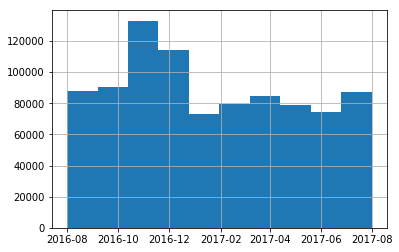

In [34]:
train_df.date.hist()

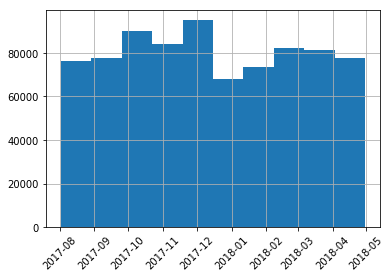

In [42]:
test_df.date.hist(xrot=45.)

In [51]:
train_df.fullVisitorId.nunique()

714167

In [53]:
train_dates_df = train_df.groupby('fullVisitorId', as_index=False).agg({'date': [min, max, 'nunique']})

In [64]:
train_dates_df.columns = train_dates_df.columns.droplevel()

In [71]:
train_dates_df = train_dates_df.rename(columns={'':'fullVisitorId'})

In [73]:
train_dates_df['nunique'].unique()

array([  1,   2,   3,   4,   5,   7,  10,   8,   9,   6,  11,  13,  12,
        20,  17,  18,  19,  24,  45,  16,  49,  21,  46,  55,  30,  35,
        15,  52,  14, 119, 116,  22,  27,  39,  43,  25,  34, 104,  29,
       145,  42,  66,  36,  41,  28,  33,  32,  60,  31,  59,  23,  88,
        38,  53, 131,  64,  61, 110,  51,  26,  83,  58,  48,  56,  68,
        50,  37,  47,  67])

In [80]:
# find Id's for train (last visit date before 2017-05-01)
train_dates_df[train_dates_df['max'] < '2017-05-01']

,fullVisitorId,min,max,nunique
0,0000010278554503158,2016-10-20,2016-10-20,1
1,0000020424342248747,2016-11-30,2016-11-30,1
2,0000027376579751715,2017-02-11,2017-02-11,1
3,0000039460501403861,2017-03-27,2017-03-27,1
4,0000040862739425590,2017-02-11,2017-02-11,1
5,000005103959234087,2016-08-21,2016-08-21,1
7,0000068403966359845,2017-04-03,2017-04-03,1
9,0000093957001069502,2016-09-27,2016-09-27,1
10,0000114156543135683,2016-08-08,2016-08-08,1
11,0000152474579038632,2016-10-23,2016-10-23,1


In [48]:
def get_train_idx(df, column='date', split_date='2017-05-01'):
    """
    TODO: add docstring
    """
    df[column] = pd.to_datetime(df[column], format="%Y%m%d")
    dates_df = df.groupby('fullVisitorId', as_index=False).agg(
        {column: [min, max]})
    dates_df.columns = dates_df.columns.droplevel()
    dates_df = dates_df.rename(columns={'':'fullVisitorId'})
    train_ids = dates_df[dates_df['min'] < split_date].loc[:,'fullVisitorId']
    return set(train_ids)

In [49]:
train_ids = get_train_idx(train_df)

In [50]:
len(train_ids)

7313

In [52]:
train_df[train_df['fullVisitorId'].isin(train_ids)]

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,totals_transactionRevenue
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,google + online,organic,NaN,google,NaN
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1.0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google,NaN
5,Organic Search,2016-09-02,2938943183656635653,2938943183656635653_1472807194,1472807194,1,1472807194,Chrome,desktop,False,Windows,not available in demo dataset,Europe,Italy,not available in demo dataset,fastwebnet.it,not available in demo dataset,Southern Europe,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
6,Organic Search,2016-09-02,1905672039242460897,1905672039242460897_1472817241,1472817241,1,1472817241,Chrome,desktop,False,Windows,not available in demo dataset,Asia,Pakistan,not available in demo dataset,unknown.unknown,not available in demo dataset,Southern Asia,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
7,Organic Search,2016-09-02,537222803633850821,537222803633850821_1472812602,1472812602,1,1472812602,Chrome,desktop,False,Windows,Brisbane,Oceania,Australia,(not set),bigpond.net.au,Queensland,Australasia,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
8,Organic Search,2016-09-02,4445454811831400414,4445454811831400414_1472805784,1472805784,1,1472805784,Internet Explorer,desktop,False,Windows,not available in demo dataset,Europe,Austria,not available in demo dataset,spar.at,not available in demo dataset,Western Europe,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
9,Organic Search,2016-09-02,9499785259412240342,9499785259412240342_1472812272,1472812272,1,1472812272,Firefox,desktop,False,Windows,not available in demo dataset,Europe,Netherlands,not available in demo dataset,chello.nl,not available in demo 

In [53]:
def train_valid_split(df, **get_idx_kwargs):
    """
    TODO: add docstring
    """
    train_ids = get_train_idx(df, **get_idx_kwargs)
    
    df_cp = df.copy()
    
    train_df = df_cp[df_cp['fullVisitorId'].isin(train_ids)]
    valid_df = df_cp[~df_cp['fullVisitorId'].isin(train_ids)]
    return train_df.reset_index(drop=True), valid_df.reset_index(drop=True)

In [54]:
df1, df2 = train_valid_split(train_df)

In [55]:
df1

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,totals_transactionRevenue
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,google + online,organic,NaN,google,NaN
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1.0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google,NaN
5,Organic Search,2016-09-02,2938943183656635653,2938943183656635653_1472807194,1472807194,1,1472807194,Chrome,desktop,False,Windows,not available in demo dataset,Europe,Italy,not available in demo dataset,fastwebnet.it,not available in demo dataset,Southern Europe,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
6,Organic Search,2016-09-02,1905672039242460897,1905672039242460897_1472817241,1472817241,1,1472817241,Chrome,desktop,False,Windows,not available in demo dataset,Asia,Pakistan,not available in demo dataset,unknown.unknown,not available in demo dataset,Southern Asia,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
7,Organic Search,2016-09-02,537222803633850821,537222803633850821_1472812602,1472812602,1,1472812602,Chrome,desktop,False,Windows,Brisbane,Oceania,Australia,(not set),bigpond.net.au,Queensland,Australasia,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
8,Organic Search,2016-09-02,4445454811831400414,4445454811831400414_1472805784,1472805784,1,1472805784,Internet Explorer,desktop,False,Windows,not available in demo dataset,Europe,Austria,not available in demo dataset,spar.at,not available in demo dataset,Western Europe,1.0,1,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,NaN
9,Organic Search,2016-09-02,9499785259412240342,9499785259412240342_1472812272,1472812272,1,1472812272,Firefox,desktop,False,Windows,not available in demo dataset,Europe,Netherlands,not available in demo dataset,chello.nl,not available in demo 

In [57]:
df2.date.unique()

array(['2017-06-23T00:00:00.000000000'], dtype='datetime64[ns]')